## Exercises

1. What type of algorithm would you use to segment a company customers database into multiple groups?
I would use a clustering agorithm, such as K-means. This kind of algorithm would group similar observations in the same group or cluster.

2. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem? Explain.
I would frame spam deterction as supervised learning because there is a clear goal: spam or not spam. Unsupervised learning has no target variable to be modeled and is used to observe new patterns in datasets.

3. What is a test set, and why would you want to use it?
A test set is the portion of the dataset that you will use to test how well/effective your model is after it's trained on the training dataset.

4. You are training a classification model with 100 variables/features that achieves 95% accuracy in the training dataset. However, when you run it in the test dataset, you only get 60% accuracy. Which of the following options are valid approached to solve this problem?
E (a and c).

In [9]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np
import matplotlib.pyplot as plt

## define bucket in which you are trying to reach
s3 = boto3.resource('s3')
bucket_name = 'daltondencklau-data445-bucket'
bucket = s3.Bucket(bucket_name)


## define csv file to read in the bucket
file_key= 'Real_Estate.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Dropping the 'No' and 'transaction_date' column

In [10]:
house_price = house_price.drop(columns = ['No', 'transaction_date'], axis =1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


## Builiding Linear Regression Model 1

In [21]:
from sklearn.model_selection import train_test_split

## defining input and target variables
X = house_price.drop(columns = 'house_price_of_unit_area', axis =1)
Y = house_price['house_price_of_unit_area']

## splitting the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

In [22]:
## building the linear regression model
from sklearn.linear_model import LinearRegression
lm_md = LinearRegression().fit(X_train, Y_train)

In [23]:
## predicting on the testing dataset
lm_preds = lm_md.predict(X_test)
lm_preds

array([51.7413717 , 29.51080917, 12.46229439, 31.8656718 , 32.76590465,
       40.26348059, 14.36139229, 39.82634563, 35.85174574, 14.57000965,
       11.73954593, 41.28106417, 43.27314403, 39.89614275, 29.93260935,
       30.65910564, 29.45565433, 38.05798265, 45.29916806, 47.24276137,
       38.90996049, 41.88587595, 50.00313907, 31.08781976, 47.82992917,
       47.24276137, 13.07230068, 44.50856666, 25.65125672, 33.70031197,
       44.73647877, 29.16295488, 27.77472655, 40.58974394, 47.24276137,
       44.97142188, 44.67687381, 53.22068566, 42.76372087, 23.26633971,
       30.16881458, 30.41494038, 46.77735052, 37.0461214 , 51.77117418,
       45.7794203 , 38.28070972, 46.03960375, 13.80108757, 41.16185425,
       32.52781186, 43.14392064, 14.75476693, 47.63341804, 33.76346413,
       44.17801589, 46.45177835, 39.79641835, 49.56257636, 43.08021314,
       34.37713283, 46.02241711, 33.56489653, 13.52833403, 13.52833403,
       46.36237091, 51.94998906, 44.88549117, 41.92962455, 39.49

In [24]:
## calculating the MSE for model 1
np.mean((Y_test - lm_preds)**2)

107.67014792289746

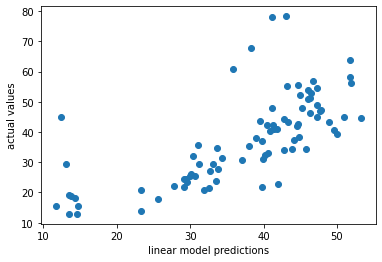

In [25]:
## visualizing results
import matplotlib.pyplot as plt
plt.scatter(lm_preds, Y_test)
plt.xlabel('linear model predictions')
plt.ylabel('actual values')
plt.show()

In [8]:
## The MSE for model 1 is 81.7

## Building Linear Regression Model 2

In [16]:
## defining input and target variables
X2 = house_price[['house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
Y2 = house_price['house_price_of_unit_area']

In [17]:
## building the linear regression model
lm_md_2 = LinearRegression().fit(X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1), Y_train)

In [18]:
## predicting on the testing dataset
lm_preds_2 = lm_md_2.predict(X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1))
lm_preds_2

array([31.60410233, 36.2122565 , 52.7392599 , 56.9696593 , 35.62574771,
       41.05675868, 38.7455773 , 29.45047288, 14.96801356, 42.11129387,
       35.86228725, 37.66588685, 43.02549964, 40.38654397, 56.13639165,
       30.52175066, 52.96362336, 16.81277133, 13.40130753, 44.85039334,
       42.96940878, 52.83072124, 51.23818313, 46.39434711, 52.71121447,
       49.33808909, 44.95642853, 16.89722358, 30.05689713, 42.21760182,
       32.31506425, 49.62096905, 17.40749395, 39.10404576, 33.39526994,
       20.66439999, 35.01320055, 46.63605361, 40.33344979, 46.54281687,
       29.34596884, 46.27311915, 29.44142823, 32.73500639, 36.10597704,
       17.71295157, 35.57157272, 37.13317367, 45.89371606, 37.13818331,
       30.6365378 , 35.1493497 , 44.14023895, 40.49899712, 17.68490614,
       27.08594895, 42.91331791, 35.01493374, 38.9340638 , 14.88387726,
       49.45502752, 46.26764959, 34.10491163, 45.93587376, 36.38448438,
       38.98454063, 32.28701882, 43.45204023, 43.61207938, 54.41

In [20]:
## calculating the MSE for model 2
np.mean((Y_test -lm_preds_2)**2)

80.00569203443483

In [13]:
## The MSE for model 2 is 127.1.

In [14]:
## Based on the MSE from both of these models, I would select the first model because the MSE value is lower.

## Reating above steps 100 times

In [20]:
MSE_results = pd.DataFrame({'md1_results': np.repeat(np.nan, 100), 'md2_results': np.repeat(np.nan, 100)})

## defining input and target variables for model 1
X = house_price.drop(columns = 'house_price_of_unit_area', axis =1)
Y = house_price['house_price_of_unit_area']

## defining input and target variables for model 2
X2 = house_price.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1)
Y2 = house_price['house_price_of_unit_area']

for i in range(0,100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)
    md1 = LinearRegression().fit(X_train, Y_train)
    
    md2 = LinearRegression().fit(X_train.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1), Y_train)
    
    ## predicting on the test dataset
    md1_preds = md1.predict(X_test)
    md2_preds = md2.predict(X_test.drop(columns = ['distance_to_the_nearest_MRT_station'], axis = 1))
    
    ## computing MSE
    mse1 = np.mean((Y_test - md1_preds)**2)
    mse2 = np.mean((Y_test - md2_preds)**2)
    MSE_results['md1_results'][i] = mse1
    MSE_results['md2_results'][i] = mse2
    
print('The mse of model 1 is: ', MSE_results['md1_results'].mean())
print('The mse of model 2 is: ', MSE_results['md2_results'].mean())
print(MSE_results)

    md1_results  md2_results
0           NaN          NaN
1           NaN          NaN
2           NaN          NaN
3           NaN          NaN
4           NaN          NaN
..          ...          ...
95          NaN          NaN
96          NaN          NaN
97          NaN          NaN
98          NaN          NaN
99          NaN          NaN

[100 rows x 2 columns]
The mse of model 1 is:  76.5064228911402
The mse of model 2 is:  82.90528254534546
    md1_results  md2_results
0    132.346802   147.812195
1     75.130584    88.426193
2     48.134225    45.052608
3     76.375415    80.379918
4    141.985745   156.005451
..          ...          ...
95    73.927887    84.532239
96    46.108595    43.078647
97    61.806008    63.120460
98    72.853171    81.539287
99   117.056624   133.973496

[100 rows x 2 columns]


In [23]:
## printing all observations
print(MSE_results.to_string())

    md1_results  md2_results
0    132.346802   147.812195
1     75.130584    88.426193
2     48.134225    45.052608
3     76.375415    80.379918
4    141.985745   156.005451
5     84.171891    90.907931
6     56.833019    56.192403
7     69.748835    76.685332
8     45.134687    44.741458
9     48.542408    43.862564
10    79.936026    78.853559
11    65.597763    80.613525
12    55.773311    68.307996
13    47.797506    44.508379
14    76.434654    70.268470
15    70.827586    72.648486
16    50.634705    57.664336
17   138.590777   150.601024
18    58.040744    66.934598
19    90.522650    95.003467
20    60.070434    71.099135
21    48.558830    52.989346
22    71.389460    74.175438
23    39.882550    45.196576
24    71.473556    72.483055
25    53.320682    64.357721
26   131.720461   140.364505
27    85.588142    88.428656
28    78.949677    88.162167
29    58.617034    56.234658
30   115.913048   129.201635
31    55.034392    55.876616
32    73.100693    73.106907
33    71.77571

### Visualizing results on a graph

In [8]:
plt.plot(MSE_results['md1_results'], color = 'skyblue')
plt.plot(MSE_results['md2_results'], color = 'salmon')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.legend(loc = 'upper right', labels = ['model 1', 'model 2'])
plt.grid()
plt.show();

NameError: name 'MSE_results' is not defined

In [3]:
## df['col']

In [ ]:
## based on the MSE Results and the model averages, I would choose Model 1 because it has a lower MSE value
## on average. In the graph about, we can visuzlize that the model 1 (skyblue) has lower MSE values compared to
## model 2 (salmon).